## 시각화의 중요성 :  앤스컴(Anscombe)의 예


### Anscombe's quartet
- 평균, 표본분산, 상관, 선형회귀선, 결정계수 등의 기술통계량이 동일하지만 분포나 그래프를 이용하여 시각화하면 전혀 다른 4개의 데이터 세트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3

'%.3f'

In [2]:
data = np.load('data/anscombe.npy')
data.shape

(4, 11, 2)

In [3]:
data

array([[[10.  ,  8.04],
        [ 8.  ,  6.95],
        [13.  ,  7.58],
        [ 9.  ,  8.81],
        [11.  ,  8.33],
        [14.  ,  9.96],
        [ 6.  ,  7.24],
        [ 4.  ,  4.26],
        [12.  , 10.84],
        [ 7.  ,  4.82],
        [ 5.  ,  5.68]],

       [[10.  ,  9.14],
        [ 8.  ,  8.14],
        [13.  ,  8.74],
        [ 9.  ,  8.77],
        [11.  ,  9.26],
        [14.  ,  8.1 ],
        [ 6.  ,  6.13],
        [ 4.  ,  3.1 ],
        [12.  ,  9.13],
        [ 7.  ,  7.26],
        [ 5.  ,  4.74]],

       [[10.  ,  7.46],
        [ 8.  ,  6.77],
        [13.  , 12.74],
        [ 9.  ,  7.11],
        [11.  ,  7.81],
        [14.  ,  8.84],
        [ 6.  ,  6.08],
        [ 4.  ,  5.39],
        [12.  ,  8.15],
        [ 7.  ,  6.42],
        [ 5.  ,  5.73]],

       [[ 8.  ,  6.58],
        [ 8.  ,  5.76],
        [ 8.  ,  7.71],
        [ 8.  ,  8.84],
        [ 8.  ,  8.47],
        [ 8.  ,  7.04],
        [ 8.  ,  5.25],
        [19.  , 12.5 ],
        [ 

In [4]:
stat_df = pd.DataFrame(index=['X_mean', 'X_var','y_mean','y_var','Xy_Corr','Xy_reg_fit'])
stat_df

""
X_mean
X_var
y_mean
y_var
Xy_Corr
Xy_reg_fit


#### np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)

Least squares polynomial fit.

- np.mean(x)
- np.var(x)
- np.mean(y)
- np.var(y)
- np.corrcoef(x,y)[0,1]
- np.polyfit(x,y,1)  # y=ax^+b를 위한 [a, b]

In [5]:
for i, d in enumerate(data):
    x = d[:,0]
    y = d[:,1]
    poly_fit = np.polyfit(x,y,1)
    stat_df[f'd{i+1}'] = [f'{np.mean(x):.2f}', f'{np.var(x):.2f}',
                          f'{np.mean(y):.2f}', f'{np.var(y):.2f}',
                          f'{np.corrcoef(x,y)[0,1]:.2f}',
                          f'{poly_fit[0]:.2f}x + {poly_fit[1]:.2f}' ]

In [6]:
stat_df

,d1,d2,d3,d4
X_mean,9.00,9.00,9.00,9.00
X_var,10.00,10.00,10.00,10.00
y_mean,7.50,7.50,7.50,7.50
y_var,3.75,3.75,3.75,3.75
Xy_Corr,0.82,0.82,0.82,0.82
Xy_reg_fit,0.50x + 3.00,0.50x + 3.00,0.50x + 3.00,0.50x + 3.00


### 시각화

- 네 가지 데이터에 대한 산점도와 회귀직선

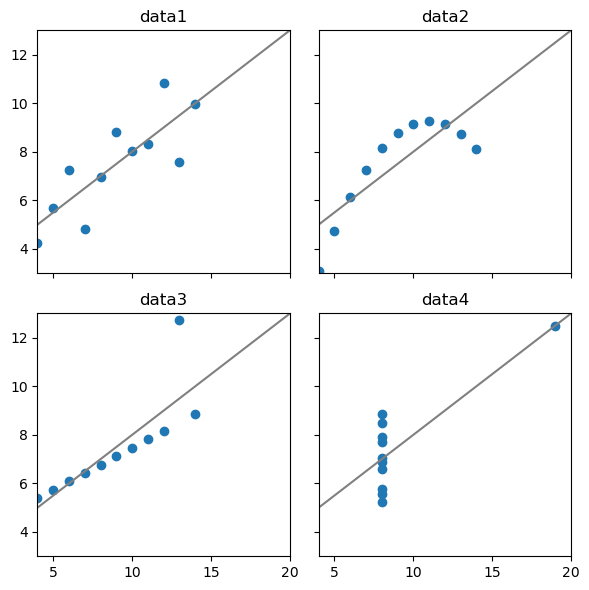

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,6),
                        sharex=True, sharey = True)

x = np.linspace(0, 30, 100)
for i, d in enumerate(data):
    poly_fit = np.polyfit(d[:,0], d[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    y = poly_1d(x)
    
    ax = axs[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    ax.set_title(f'data{i+1}')
    ax.scatter(d[:,0], d[:,1])
    ax.plot(x,y, color='gray')
    
plt.tight_layout()
plt.show()

=> 기술통계와 분석 결과가 모두 동일한 4개의 데이터에 대하여 시각화를 한 결과, 데이터 분포 모양이 다름을 확인

-------